In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

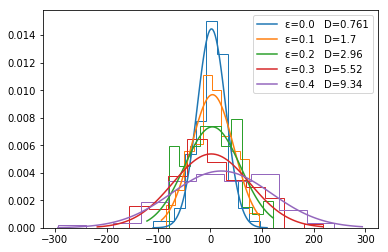

In [167]:
steps = 1000
position = np.zeros(steps+1)
εs = [0, 0.1, 0.2, 0.3, 0.4]
D = 0.8
walks = 100
for εn,ε in enumerate(εs):
    v = []
    for w in range(walks):
        richtung = 1
        p = np.random.choice((1,-1),steps,p = [0.5+ε,0.5-ε])
        for t in range(steps):
            richtung *= p[t]
            position[t+1] = position[t] + richtung
        v.append(position[-1])
    plt.hist(v, histtype='step', stacked=True,density=True, color="C%i"%εn)
    verteilung = np.histogram(v, normed=True)
    binbreite = np.diff(verteilung[1])[0]
    x = np.linspace(-max(np.abs(v)), max(np.abs(v)), 100)
    y = lambda x,D: 1/np.sqrt(2*np.pi*D*steps) * np.exp(-(x- np.mean(v))**2/(2*D*steps))
    best_vals, covar = curve_fit(y, verteilung[1][:-1]+binbreite/2 , verteilung[0], p0 = D)
    plt.plot(x,y(x,best_vals),C="C%i"%εn, label="ε={:.1f}   D={:.3}".format(ε,best_vals[0]))
plt.legend()
plt.show()